## Import Dependencies

In [150]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re


In [151]:
import warnings
warnings.filterwarnings("ignore")

## Load Data

In [152]:
jobs_df = pd.read_csv('data_science_job.csv', encoding='latin-1')

jobs_df.rename(columns={'Requirment of the company ': 'Requirement of the company'}, inplace=True)
jobs_df.head()

,Company,Job Title,Location,Job Type,Experience level,Salary,Requirement of the company,Facilities
0,SGS,Clinical Data Analyst,"Richardson, TX, United States",Full Time,Entry-level,48K+ *,"Computer Science,Data quality,Genetics,Mathema...",",,,,"
1,Ocorian,AML/CFT & Data Analyst,"Ebène, Mauritius",Full Time,Entry-level,48K+ *,"Agile,Data management,Finance,Security,,",",,,,"
2,Cricut,Machine Learning Engineer,"South Jordan, UT, United States",Full Time,NaN,90K+ *,"Agile,Architecture,AWS,Computer Science,Comput...","Career development,,,,"
3,Bosch Group,Application Developer & Data Analyst,"Nonantola, Italy",Full Time,Entry-level,48K+ *,"Engineering,Industrial,Oracle,Power BI,R,R&D",",,,,"
4,Publicis Groupe,Data Engineer Full time (Public Sector) USA,"Arlington, VA, United States",Full Time,Mid-level,108K+,"AWS,Azure,Computer Science,Consulting,Dataflow...","Flex hours,Flex vacation,Parental leave,Unlimi..."


In [153]:
jobs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198 entries, 0 to 3197
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Company                     3197 non-null   object
 1   Job Title                   3197 non-null   object
 2   Location                    3197 non-null   object
 3   Job Type                    3197 non-null   object
 4   Experience level            2962 non-null   object
 5   Salary                      3009 non-null   object
 6   Requirement of the company  3198 non-null   object
 7   Facilities                  3198 non-null   object
dtypes: object(8)
memory usage: 200.0+ KB


## Data Cleaning

In [154]:
df = jobs_df.copy()

In [155]:
df.isnull().sum()

Company                         1
Job Title                       1
Location                        1
Job Type                        1
Experience level              236
Salary                        189
Requirement of the company      0
Facilities                      0
dtype: int64

### Handle Null Values

In [156]:
df.dropna(subset=['Job Title'], inplace=True)

In [157]:
df['Experience level'].fillna('None', inplace=True)

In [158]:
df['Salary'].fillna(' 0K+ *', inplace=True)

In [159]:
df.isnull().sum()

Company                       0
Job Title                     0
Location                      0
Job Type                      0
Experience level              0
Salary                        0
Requirement of the company    0
Facilities                    0
dtype: int64

### Convert all characters to lowercase

In [160]:

df['Company'] = df['Company'].str.lower()
df['Job Title'] = df['Job Title'].str.lower()
df['Location'] = df['Location'].str.lower()
df['Job Type'] = df['Job Type'].str.lower()
df['Experience level'] = df['Experience level'].str.lower()
df['Requirement of the company'] = df['Requirement of the company'].str.lower()
df['Facilities'] = df['Facilities'].str.lower()

df.head()

,Company,Job Title,Location,Job Type,Experience level,Salary,Requirement of the company,Facilities
0,sgs,clinical data analyst,"richardson, tx, united states",full time,entry-level,48K+ *,"computer science,data quality,genetics,mathema...",",,,,"
1,ocorian,aml/cft & data analyst,"ebène, mauritius",full time,entry-level,48K+ *,"agile,data management,finance,security,,",",,,,"
2,cricut,machine learning engineer,"south jordan, ut, united states",full time,none,90K+ *,"agile,architecture,aws,computer science,comput...","career development,,,,"
3,bosch group,application developer & data analyst,"nonantola, italy",full time,entry-level,48K+ *,"engineering,industrial,oracle,power bi,r,r&d",",,,,"
4,publicis groupe,data engineer full time (public sector) usa,"arlington, va, united states",full time,mid-level,108K+,"aws,azure,computer science,consulting,dataflow...","flex hours,flex vacation,parental leave,unlimi..."


### Convert 'Salary' to int

In [161]:
salary_list = df['Salary'].str.split('K')

salary = []
for row in salary_list:
    temp = row[0].split(' ')

    if temp[0] == 'GBP':
        salary.append(int(float(temp[1]) * 1.22))
    elif temp[0] == 'EUR':
        salary.append(int(float(temp[1]) * 1.07))
    else:
        salary.append(int(float(temp[1])))

df['Salary'] = salary

df.head()

,Company,Job Title,Location,Job Type,Experience level,Salary,Requirement of the company,Facilities
0,sgs,clinical data analyst,"richardson, tx, united states",full time,entry-level,48,"computer science,data quality,genetics,mathema...",",,,,"
1,ocorian,aml/cft & data analyst,"ebène, mauritius",full time,entry-level,48,"agile,data management,finance,security,,",",,,,"
2,cricut,machine learning engineer,"south jordan, ut, united states",full time,none,90,"agile,architecture,aws,computer science,comput...","career development,,,,"
3,bosch group,application developer & data analyst,"nonantola, italy",full time,entry-level,48,"engineering,industrial,oracle,power bi,r,r&d",",,,,"
4,publicis groupe,data engineer full time (public sector) usa,"arlington, va, united states",full time,mid-level,108,"aws,azure,computer science,consulting,dataflow...","flex hours,flex vacation,parental leave,unlimi..."


### Remove 'level' from 'Experience level'

In [162]:
experience_level = df['Experience level'].str.split('-')

experience = [row[0] for row in experience_level]

df['Experience level'] = experience

In [163]:
df.head()

,Company,Job Title,Location,Job Type,Experience level,Salary,Requirement of the company,Facilities
0,sgs,clinical data analyst,"richardson, tx, united states",full time,entry,48,"computer science,data quality,genetics,mathema...",",,,,"
1,ocorian,aml/cft & data analyst,"ebène, mauritius",full time,entry,48,"agile,data management,finance,security,,",",,,,"
2,cricut,machine learning engineer,"south jordan, ut, united states",full time,none,90,"agile,architecture,aws,computer science,comput...","career development,,,,"
3,bosch group,application developer & data analyst,"nonantola, italy",full time,entry,48,"engineering,industrial,oracle,power bi,r,r&d",",,,,"
4,publicis groupe,data engineer full time (public sector) usa,"arlington, va, united states",full time,mid,108,"aws,azure,computer science,consulting,dataflow...","flex hours,flex vacation,parental leave,unlimi..."


### Clean 'Facilities'

In [164]:
facilities = []

for row in df['Facilities']:
    words = row.split(',')
    words = list(filter(None, words))

    if len(words) == 0:
        facilities.append('None')

    else:
        facility = ''
        for word in words:
            if len(facility) == 0:
                facility = word
            else:
                facility = facility + ',' + word.strip()
        facilities.append(facility)

df['Facilities'] = facilities

In [165]:
df.head()

,Company,Job Title,Location,Job Type,Experience level,Salary,Requirement of the company,Facilities
0,sgs,clinical data analyst,"richardson, tx, united states",full time,entry,48,"computer science,data quality,genetics,mathema...",None
1,ocorian,aml/cft & data analyst,"ebène, mauritius",full time,entry,48,"agile,data management,finance,security,,",None
2,cricut,machine learning engineer,"south jordan, ut, united states",full time,none,90,"agile,architecture,aws,computer science,comput...",career development
3,bosch group,application developer & data analyst,"nonantola, italy",full time,entry,48,"engineering,industrial,oracle,power bi,r,r&d",None
4,publicis groupe,data engineer full time (public sector) usa,"arlington, va, united states",full time,mid,108,"aws,azure,computer science,consulting,dataflow...","flex hours,flex vacation,parental leave,unlimi..."


### Clean 'Requirement of the company'

In [166]:
requirements = []

for row in df['Requirement of the company']:
    words = row.split(',')
    words = list(filter(None, words))
    if len(words) == 0:
        requirements.append('None')
    else:
        requirement = ''
        for word in words:
            if len(requirement) == 0:
                requirement = word
            else:
                requirement = requirement + ',' + word.strip()
        requirements.append(requirement)

df['Requirement of the company'] = requirements

In [167]:
df.head()

,Company,Job Title,Location,Job Type,Experience level,Salary,Requirement of the company,Facilities
0,sgs,clinical data analyst,"richardson, tx, united states",full time,entry,48,"computer science,data quality,genetics,mathema...",None
1,ocorian,aml/cft & data analyst,"ebène, mauritius",full time,entry,48,"agile,data management,finance,security",None
2,cricut,machine learning engineer,"south jordan, ut, united states",full time,none,90,"agile,architecture,aws,computer science,comput...",career development
3,bosch group,application developer & data analyst,"nonantola, italy",full time,entry,48,"engineering,industrial,oracle,power bi,r,r&d",None
4,publicis groupe,data engineer full time (public sector) usa,"arlington, va, united states",full time,mid,108,"aws,azure,computer science,consulting,dataflow...","flex hours,flex vacation,parental leave,unlimi..."


### From 'Location' check is remote or not

In [168]:
# Check location is remote or not
location = df['Location'].str.split('-|,| ')

isRemote = []

for loc in location:
    if 'remote' in loc:
        isRemote.append(True)
    else:
        isRemote.append(False)

df['Is Remote'] = isRemote


In [169]:
df.head()

,Company,Job Title,Location,Job Type,Experience level,Salary,Requirement of the company,Facilities,Is Remote
0,sgs,clinical data analyst,"richardson, tx, united states",full time,entry,48,"computer science,data quality,genetics,mathema...",None,False
1,ocorian,aml/cft & data analyst,"ebène, mauritius",full time,entry,48,"agile,data management,finance,security",None,False
2,cricut,machine learning engineer,"south jordan, ut, united states",full time,none,90,"agile,architecture,aws,computer science,comput...",career development,False
3,bosch group,application developer & data analyst,"nonantola, italy",full time,entry,48,"engineering,industrial,oracle,power bi,r,r&d",None,False
4,publicis groupe,data engineer full time (public sector) usa,"arlington, va, united states",full time,mid,108,"aws,azure,computer science,consulting,dataflow...","flex hours,flex vacation,parental leave,unlimi...",False


### Clean 'Location', split to country, region, and city if possible

In [170]:
# Name of countries
country_list = [
    'united states',
    'canada',
    'italy',
    'portugal',
    'mauritius',
    'thailand',
    'switzerland',
    'india',
    'germany',
    'australia',
    'spain',
    'france',
    'mexico',
    'brazil',
    'malaysia',
    'argentina',
    'austria',
    'ukraine',
    'united kingdom',
    'usa',
    'costa rica',
    'england',
    'belgium',
    'lithuania',
    'israel',
    'colombia',
    'zambia',
    'czech republic',
    'bra',
    'poland',
    'sgp',
    'serbia',
    'bangkok',
    'jordan',
    'netherlands',
    'luxembourg',
    'nigeria',
    'sweden',
    'south africa',
    'egypt',
    'philippines',
    'zimbabwe',
    'türkiye',
    'finland',
    'new zealand',
    'norway',
    'vietnam',
    'romania',
    'bulgaria',
    'singapore',
    'denmark',
    'korea',
    'uk',
    'athens',
    'indonesia',
    'pakistan',
    'oman',
    'armenia',
    'jpn',
    'sri lanka',
    'ireland',
    'estonia',
    'greece',
    'hungary',
    'cyprus',
    'turkey',
    'north macedonia',
    'niger',
    'nepal',
    'slovenia',
    'us',
    'u.k'
    ]

In [171]:
# Abbreviations for some country names
country_dic = {
    'usa' : 'united states',
    'bra' : 'brazil',
    'sgp' : 'singapore',
    'uk' : 'united kingdom',
    'jpn' : 'japan',
    'türkiye' : 'turkey',
    'us' : 'united states',
    'u.k' : 'united kingdom'}

In [172]:
# States of United States
state_names = ["alaska", 
               "alabama", 
               "arkansas", 
               "american samoa", 
               "arizona", 
               "california", 
               "colorado", 
               "connecticut", 
               "district ", 
               "district of columbia", 
               "delaware", 
               "florida", 
               "georgia", 
               "guam", 
               "hawaii", 
               "iowa", 
               "idaho", 
               "illinois", 
               "indiana", 
               "kansas", 
               "kentucky", 
               "louisiana", 
               "massachusetts", 
               "maryland", 
               "maine", 
               "michigan", 
               "minnesota", 
               "missouri", 
               "mississippi", 
               "montana", 
               "north carolina", 
               "north dakota", 
               "nebraska", 
               "new hampshire", 
               "new jersey", 
               "new mexico", 
               "nevada", 
               "new york", 
               "ohio", 
               "oklahoma", 
               "oregon", 
               "pennsylvania", 
               "puerto rico", 
               "rhode island", 
               "south carolina", 
               "south dakota", 
               "tennessee", 
               "texas", 
               "utah", 
               "virginia", 
               "virgin islands", 
               "vermont", 
               "washington", 
               "wisconsin", 
               "west virginia", 
               "wyoming",
               "ak",
               "al",
               "ar",
               "az",
               "ca",
               "co",
               "ct",
               "dc",
               "de",
               "fl",
               "ga",
               "hi",
               "ia",
               "id",
               "il",
               "in",
               "ks",
               "ky",
               "la",
               "ma",
               "md",
               "me",
               "mi",
               "mn",
               "mo",
               "ms",
               "mt",
               "nc",
               "nd",
               "ne",
               "nh",
               "nj",
               "nm",
               "nv",
               "ny",
               "oh",
               "ok",
               "or",
               "pa",
               "ri",
               "sc",
               "sd",
               "tn",
               "tx",
               "ut",
               "va",
               "vt",
               "wa",
               "wi",
               "wv",
               "wy",
               "california (hq)"]

In [173]:
# Abbreviations and full name of us state
us_states_dic = {
    "ak" : "alaska",
    "al" : "alabama",
    "ar" : "arkansas",
    "az" : "arizona",
    "ca" : "california",
    "co" : "colorado",
    "ct" : "connecticut",
    "dc" : "district of columbia",
    "de" : "delaware",
    "fl" : "florida",
    "ga" : "georgia",
    "hi" : "hawaii",
    "ia" : "iowa",
    "id" : "idaho",
    "il" : "illinois",
    "in" : "indiana",
    "ks" : "kansas",
    "ky" : "kentucky",
    "la" : "louisiana",
    "ma" : "massachusetts",
    "md" : "maryland",
    "me" : "maine",
    "mi" : "michigan",
    "mn" : "minnesota",
    "mo" : "missouri",
    "ms" : "mississippi",
    "mt" : "montana",
    "nc" : "north carolina",
    "nd" : "north dakota",
    "ne" : "nebraska",
    "nh" : "new hampshire",
    "nj" : "new jersey",
    "nm" : "new mexico",
    "nv" : "nevada",
    "ny" : "new york",
    "oh" : "ohio",
    "ok" : "oklahoma",
    "or" : "oregon",
    "pa" : "pennsylvania",
    "ri" : "ihode island",
    "sc" : "south carolina",
    "sd" : "south dakota",
    "tn" : "tennessee",
    "tx" : "texas",
    "ut" : "utah",
    "va" : "virginia",
    "vt" : "vermont",
    "wa" : "washington",
    "wi" : "wisconsin",
    "wv" : "west virginia",
    "wy" : "wyoming",
    "california (hq)" : "california"}

In [174]:
df

,Company,Job Title,Location,Job Type,Experience level,Salary,Requirement of the company,Facilities,Is Remote
0,sgs,clinical data analyst,"richardson, tx, united states",full time,entry,48,"computer science,data quality,genetics,mathema...",None,False
1,ocorian,aml/cft & data analyst,"ebène, mauritius",full time,entry,48,"agile,data management,finance,security",None,False
2,cricut,machine learning engineer,"south jordan, ut, united states",full time,none,90,"agile,architecture,aws,computer science,comput...",career development,False
3,bosch group,application developer & data analyst,"nonantola, italy",full time,entry,48,"engineering,industrial,oracle,power bi,r,r&d",None,False
4,publicis groupe,data engineer full time (public sector) usa,"arlington, va, united states",full time,mid,108,"aws,azure,computer science,consulting,dataflow...","flex hours,flex vacation,parental leave,unlimi...",False
...,...,...,...,...,...,...,...,...,...
3193,western digital,data scientist - new college graduate,"biñan, philippines",full time,entry,39,"apis,clustering,computer science,data visualiz...",career development,False
3194,experian,cloud data analyst,"heredia, costa rica",full time,senior,92,"aws,big data,computer science,gcp,snowflake,sql","equity,medical leave,salary bonus",False
3195,locus robotics,"robotics engineer, sensors","wilmington, ma, united states",full time,senior,62,"e-commerce,engineering,linux,python,robotics,s...",None,False
3196,atb financial,data scientist,"edmonton, alberta, canada",full time,entry,39,"computer science,data analytics,data mining,ec...","career development,startup environment",False


In [175]:
locations = df['Location']

cities = []
regions = []
countries = []

companies = []
job_titles = []
job_types = []
experience_level = []
salaries = []
requirements = []
facilities = []
is_remote = []

for n in range(len(locations)):
    if isRemote[n] == True:
        cities.append('none')
        regions.append('none')
        countries.append('none')
        
        companies.append(df['Company'].iloc[n])
        job_titles.append(df['Job Title'].iloc[n])
        job_types.append(df['Job Type'].iloc[n])
        experience_level.append(df['Experience level'].iloc[n])
        salaries.append(df['Salary'].iloc[n])
        requirements.append(df['Requirement of the company'].iloc[n])
        facilities.append(df['Facilities'].iloc[n])
        is_remote.append(True)
    else:
        loc_list = re.split(';|&|-|/|\||\(|\)', locations[n])
        loc_list = [l.strip() for l in loc_list]
        loc_list = list(filter(None, loc_list))
 
        for loc in loc_list:
            loc_detail = loc.split(',')
            loc_detail = [l.strip() for l in loc_detail]
            loc_detail = list(filter(None, loc_detail))
            
            temp_country = 'none'
            temp_region = 'none'
            temp_city = 'none'
            
            for country in loc_detail:
                if country in country_list:
                    temp_country = country
                    loc_detail.remove(temp_country)
                    break
            if temp_country == 'none':
                for region in loc_detail:
                    if region in state_names:
                        temp_country = 'united states'
                        temp_region = region
                        loc_detail.remove(region)
                        if temp_region in loc_detail:
                            loc_detail.remove(temp_region)
                        break

            if len(loc_detail) > 0:
                if '?' not in loc_detail[0]:
                    temp_city = loc_detail[0]
                    
            if temp_region == 'none' and len(loc_detail) > 1:
                if '?' not in loc_detail[1]:
                    temp_region = loc_detail[1]

            if 'remote' in temp_country  or 'remote' in temp_region or 'remote' in temp_city:
                countries.append('none')
                regions.append('none')
                cities.append('none')
                is_remote.append(True)
            else:
                if 'none' in temp_country and 'none' in temp_region and 'none' in temp_city:
                    continue
                else:
                    countries.append(temp_country)
                    regions.append(temp_region)
                    cities.append(temp_city)
                    is_remote.append(False)

            companies.append(df['Company'].iloc[n])
            job_titles.append(df['Job Title'].iloc[n])
            job_types.append(df['Job Type'].iloc[n])
            experience_level.append(df['Experience level'].iloc[n])
            salaries.append(df['Salary'].iloc[n])
            requirements.append(df['Requirement of the company'].iloc[n])
            facilities.append(df['Facilities'].iloc[n])

for n in range(len(countries)):
    if countries[n] in country_dic:
        countries[n] = country_dic.get(countries[n])

for n in range(len(regions)):
    if regions[n] in us_states_dic:
        regions[n] = us_states_dic.get(regions[n])

new_df = pd.DataFrame(list(zip(companies, job_titles, job_types, experience_level, salaries, requirements, facilities, is_remote, cities, regions, countries)), 
                      columns=['Company', 'Job Title', 'Job Type', 'Experience level', 'Salary', 'Requirement of the company', 'Facilities', 'Is Remote', 'City', 'Region', 'Country'])

In [176]:
df = new_df
df.head()

,Company,Job Title,Job Type,Experience level,Salary,Requirement of the company,Facilities,Is Remote,City,Region,Country
0,sgs,clinical data analyst,full time,entry,48,"computer science,data quality,genetics,mathema...",None,False,richardson,texas,united states
1,ocorian,aml/cft & data analyst,full time,entry,48,"agile,data management,finance,security",None,False,ebène,none,mauritius
2,cricut,machine learning engineer,full time,none,90,"agile,architecture,aws,computer science,comput...",career development,False,south jordan,utah,united states
3,bosch group,application developer & data analyst,full time,entry,48,"engineering,industrial,oracle,power bi,r,r&d",None,False,nonantola,none,italy
4,publicis groupe,data engineer full time (public sector) usa,full time,mid,108,"aws,azure,computer science,consulting,dataflow...","flex hours,flex vacation,parental leave,unlimi...",False,arlington,virginia,united states


# EDA

In [177]:
print("number of unique Job Titles:",df["Job Title"].nunique())
shortlisted_titles = df["Job Title"].value_counts()
shortlisted_titles

number of unique Job Titles: 2129


Job Title
data engineer                                                         122
data scientist                                                         92
data analyst                                                           92
senior data engineer                                                   73
machine learning engineer                                              54
                                                                     ... 
data & analytics engineer                                               1
senior data scientist (p3485)                                           1
data engineer with top secret                                           1
senior frontend software engineer, machine learning infrastructure      1
business intelligence analyst / analyste bi                             1
Name: count, Length: 2129, dtype: int64

In [178]:
job_titles=['DataAnalyst','DataEngineer','DataEngineer','DataScientist','MLEngineer','BIAnalyst',
           'AIEngineer','SoftwareEngineer','DevOpsEngineer','DataArchitect','BigDataEngineer']

In [179]:
import re

def keywordSearch(w):
    return re.compile(r'\b({0})\b'.format(w), flags=re.IGNORECASE).search

df['Updated Job Title'] = df['Job Title']

df['Updated Job Title'] = df['Updated Job Title'].str.strip()
df['Updated Job Title'] = df['Updated Job Title'].str.replace('-', ' ')
df['Updated Job Title'] = df['Updated Job Title'].str.replace('/', ' ')
df['Updated Job Title'] = df['Updated Job Title'].str.replace('&', ' ')
df['Updated Job Title'] = df['Updated Job Title'].str.replace(',', ' ')
df['Updated Job Title'] = df['Updated Job Title'].str.replace(';', ' ')


for i, n in enumerate(df['Updated Job Title']):
    ml1 = keywordSearch('machine learning')(str(n))
    ml2 = keywordSearch('deep learning')(str(n))
    ml3 = keywordSearch('nlp')(str(n))
    ml4 = keywordSearch('natural language processing')(str(n))
    ml5 = keywordSearch('supervised learning')(str(n))
    ml6 = keywordSearch('ml')(str(n))

    bi1 = keywordSearch('business intelligence')(str(n))
    bi2 = keywordSearch('bi')(str(n))
    bi3 = keywordSearch('powerbi')(str(n))
    bi4 = keywordSearch('power bI')(str(n))
    bi5 = keywordSearch('business intel')(str(n))

    sw1 = keywordSearch('software engineer')(str(n))
    sw2 = keywordSearch('swe')(str(n))
    sw3 = keywordSearch('data platform')(str(n))
    sw4 = keywordSearch('backend')(str(n))
    sw5 = keywordSearch('frontend')(str(n))
    sw6 = keywordSearch('full stack')(str(n))
    sw7 = keywordSearch('software development')(str(n))

    ai1 = keywordSearch('ai')(str(n))
    ai2 = keywordSearch('robotics')(str(n))
    ai3 = keywordSearch('artificial intelligence')(str(n))

    devops1 = keywordSearch('devops')(str(n))
    devops2 = keywordSearch('operations')(str(n))
    devops3 = keywordSearch('dataops')(str(n))
    devops4 = keywordSearch('mlops')(str(n))

    data_ana1 = keywordSearch('data analyst')(str(n))
    data_ana2 = keywordSearch('data analytics')(str(n))
    data_ana3 = keywordSearch('analytics engineer')(str(n))
    data_ana4 = keywordSearch('insight analyst')(str(n))
    data_ana5 = keywordSearch('visualization')(str(n))
    data_ana6 = keywordSearch('research analyst')(str(n))

    data_sci1 = keywordSearch('data scientist')(str(n))
    data_sci2 = keywordSearch('data science')(str(n))
    data_sci3 = keywordSearch('research scientist')(str(n))
    data_sci4 = keywordSearch('applied scientist')(str(n))

    d_eng1 = keywordSearch('data engineer')(str(n))
    d_eng2 = keywordSearch('data engineering')(str(n))
    d_eng3 = keywordSearch('data pipeline')(str(n))
    d_eng4 = keywordSearch('etl')(str(n))
    d_eng5 = keywordSearch('data management')(str(n))
    d_eng6 = keywordSearch('data developer')(str(n))
    d_eng7 = keywordSearch('cloud')(str(n))


    data_arch = keywordSearch('Data Architect')(str(n))
    po = keywordSearch('product owner')(str(n))
    pm = keywordSearch('product manager')(str(n))

    if ml1 or ml2 or ml3 or ml4 or ml5 or ml6:
        df.loc[i, "Updated Job Title"] = "ml engineer"
    elif bi1 or bi2 or bi3 or bi4 or bi5:
        df.loc[i, "Updated Job Title"] = "bi analyst"
    elif sw1 or sw2 or sw3 or sw4 or sw5 or sw6 or sw7:
        df.loc[i, "Updated Job Title"] = "software engineer"
    elif ai1 or ai2 or ai3:
        df.loc[i, "Updated Job Title"] = "ai engineer"
    elif devops1 or devops2 or devops3 or devops4:
        df.loc[i, "Updated Job Title"] = "devops engineer"
    elif data_ana1 or data_ana2 or data_ana3 or data_ana4 or data_ana5 or data_ana6:
        df.loc[i, "Updated Job Title"] = "data analyst"
    elif data_sci1 or data_sci2 or data_sci3 or data_sci4:
        df.loc[i, "Updated Job Title"] = "data scientist"
    elif d_eng1 or d_eng2 or d_eng3 or d_eng4 or d_eng5 or d_eng6 or d_eng7:
        df.loc[i, "Updated Job Title"] = "data engineer"
    elif data_arch:
        df.loc[i, "Updated Job Title"] = "data architect"
    elif po:
        df.loc[i, "Updated Job Title"] = "product owner"
    elif pm:
        df.loc[i, "Updated Job Title"] = "product manager"
    else:
        df.loc[i, "Updated Job Title"] = "other"


In [180]:
df.head()

,Company,Job Title,Job Type,Experience level,Salary,Requirement of the company,Facilities,Is Remote,City,Region,Country,Updated Job Title
0,sgs,clinical data analyst,full time,entry,48,"computer science,data quality,genetics,mathema...",None,False,richardson,texas,united states,data analyst
1,ocorian,aml/cft & data analyst,full time,entry,48,"agile,data management,finance,security",None,False,ebène,none,mauritius,data analyst
2,cricut,machine learning engineer,full time,none,90,"agile,architecture,aws,computer science,comput...",career development,False,south jordan,utah,united states,ml engineer
3,bosch group,application developer & data analyst,full time,entry,48,"engineering,industrial,oracle,power bi,r,r&d",None,False,nonantola,none,italy,data analyst
4,publicis groupe,data engineer full time (public sector) usa,full time,mid,108,"aws,azure,computer science,consulting,dataflow...","flex hours,flex vacation,parental leave,unlimi...",False,arlington,virginia,united states,data engineer


In [181]:
print("number of unique Job Titles:",df["Updated Job Title"].nunique())
shortlisted_titles = df["Updated Job Title"].value_counts()
shortlisted_titles

number of unique Job Titles: 12


Updated Job Title
data analyst         730
data engineer        691
data scientist       621
ml engineer          500
other                346
bi analyst           262
ai engineer          157
software engineer    130
devops engineer       76
data architect        56
product manager       19
product owner          6
Name: count, dtype: int64

In [182]:
df.describe()

,Salary
count,3594.000000
mean,85.471898
std,46.423916
min,0.000000
25%,55.000000
50%,73.000000
75%,115.000000
max,315.000000


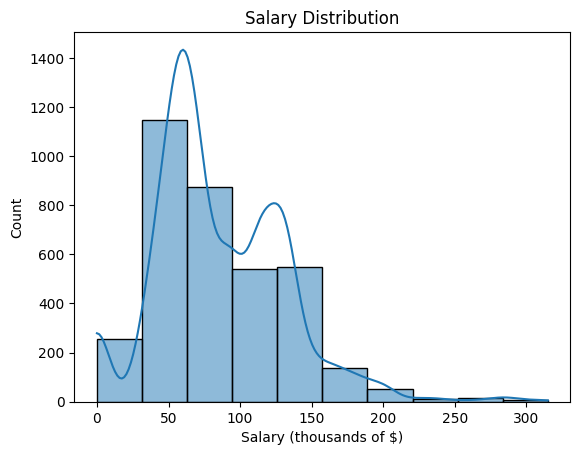

In [183]:
sns.histplot(df['Salary'], bins=10, kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary (thousands of $)')
plt.show()

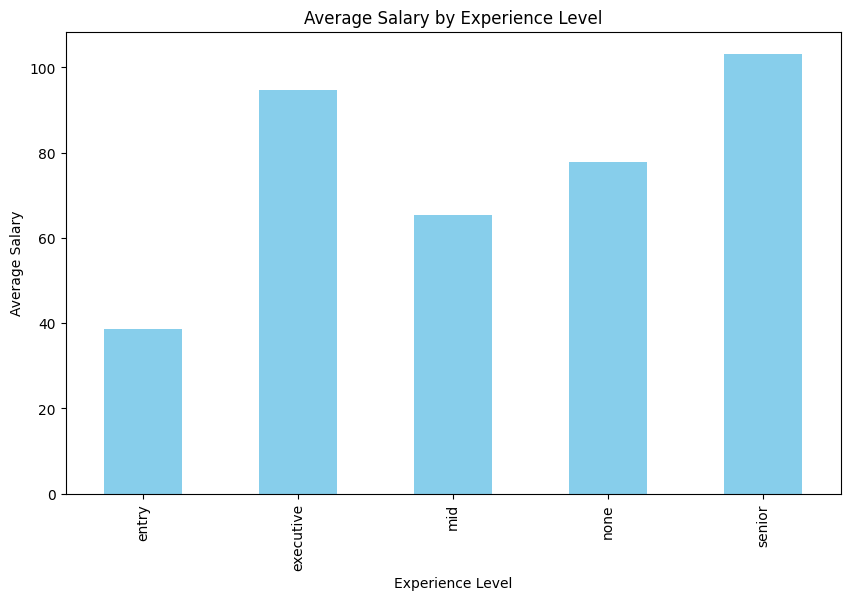

In [184]:
plt.figure(figsize=(10, 6))
df.groupby('Experience level')['Salary'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary')
plt.show()

<Figure size 1000x600 with 0 Axes>

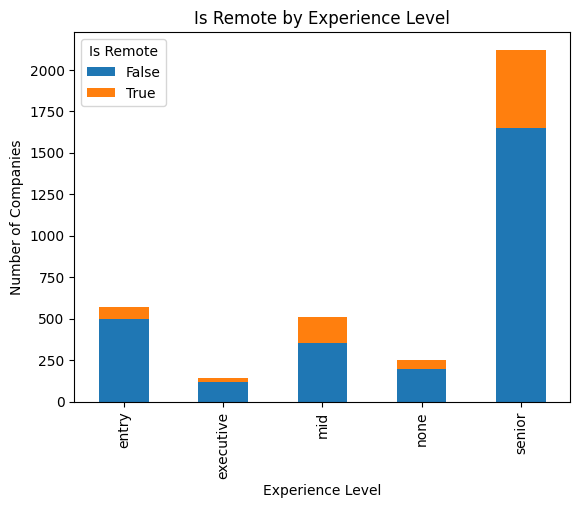

In [185]:
plt.figure(figsize=(10, 6))
df.groupby('Experience level')['Is Remote'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.title('Is Remote by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Number of Companies')
plt.legend(title='Is Remote')
plt.show()

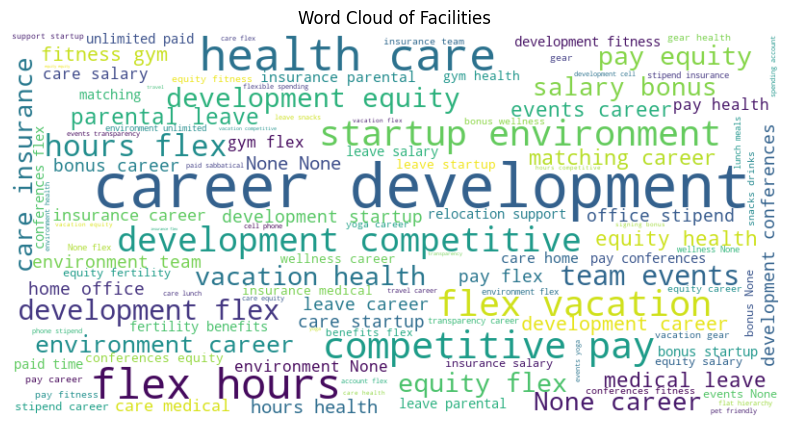

In [186]:
from wordcloud import WordCloud

all_facilities = ' '.join(df['Facilities'].explode().dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_facilities)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.title('Word Cloud of Facilities')
plt.show()


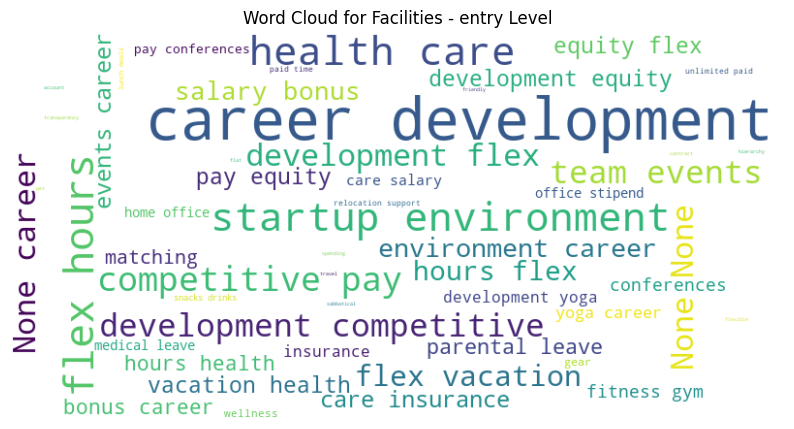

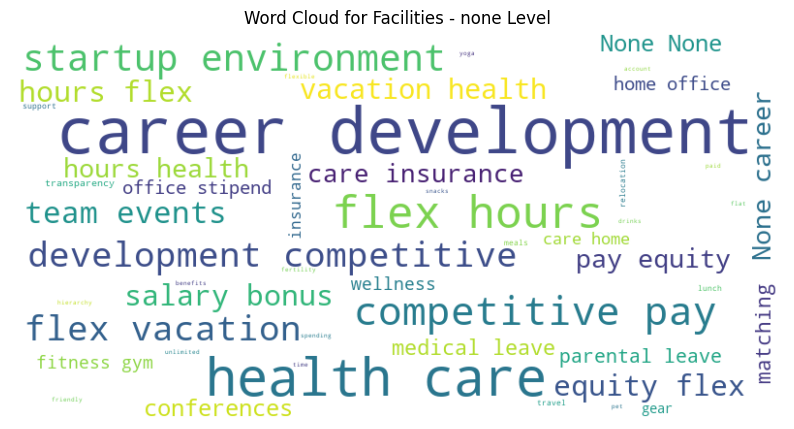

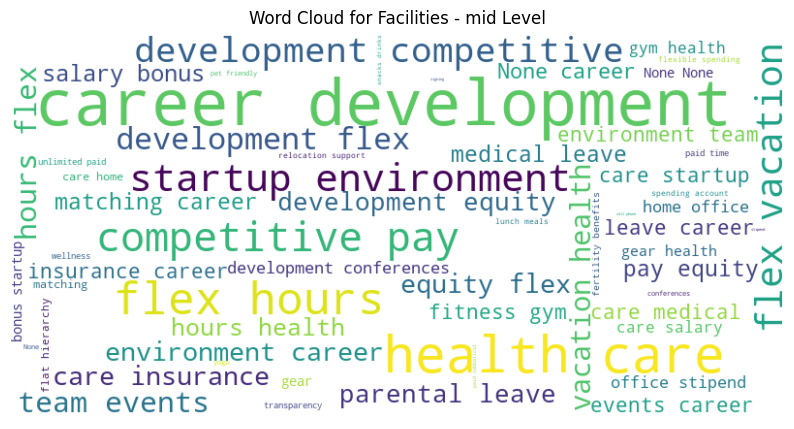

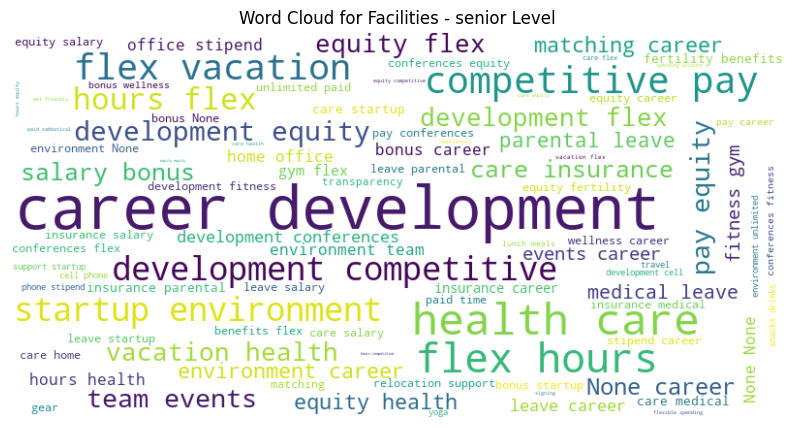

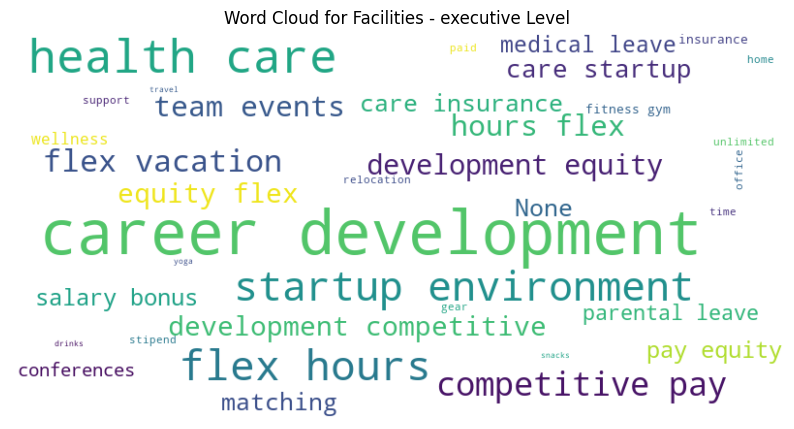

In [187]:
experience_levels = df['Experience level'].unique()

for level in experience_levels:
    filtered_data = df[df['Experience level'] == level]

    # Combine all facilities for the current experience level into a single string
    facilities = ' '.join(filtered_data['Facilities'])

    # Generate the word cloud
    if len(facilities) > 0:
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(facilities)

        # Plot the WordCloud image for the current experience level
        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for Facilities - {level} Level')
        plt.show()

In [188]:
df_Requirement = df.groupby('Experience level')['Requirement of the company'].apply(lambda x: ''.join(x)).reset_index()

In [189]:
def list_requirement(data):
    filtered_data = df_Requirement[df_Requirement['Experience level'] == data]

    requirement_list = [skill.strip() for skills in filtered_data['Requirement of the company'] for skill in skills.split(',') if skill.strip() != ' ']

    requirement_counts = pd.Series(requirement_list).value_counts().head(6)

    requirement_counts.plot(kind='bar', figsize=(10, 6))

    plt.xlabel('Requirement of the company')
    plt.ylabel('Frequency')
    plt.title(f'Requirement list for {data}')

    plt.xticks(rotation=90)

    plt.tight_layout()
    plt.show()


In [190]:
df_Requirement

,Experience level,Requirement of the company
0,entry,"computer science,data quality,genetics,mathema..."
1,executive,"finance,research,testingaws,azure,computer sci..."
2,mid,"aws,azure,computer science,consulting,dataflow..."
3,none,"agile,architecture,aws,computer science,comput..."
4,senior,"computer science,deep learning,industrial,mach..."


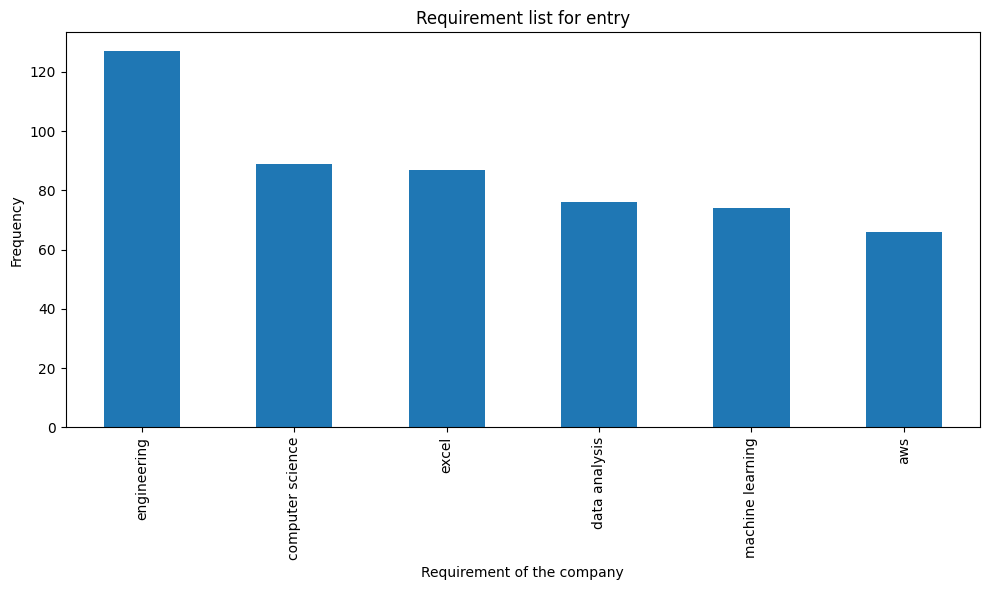

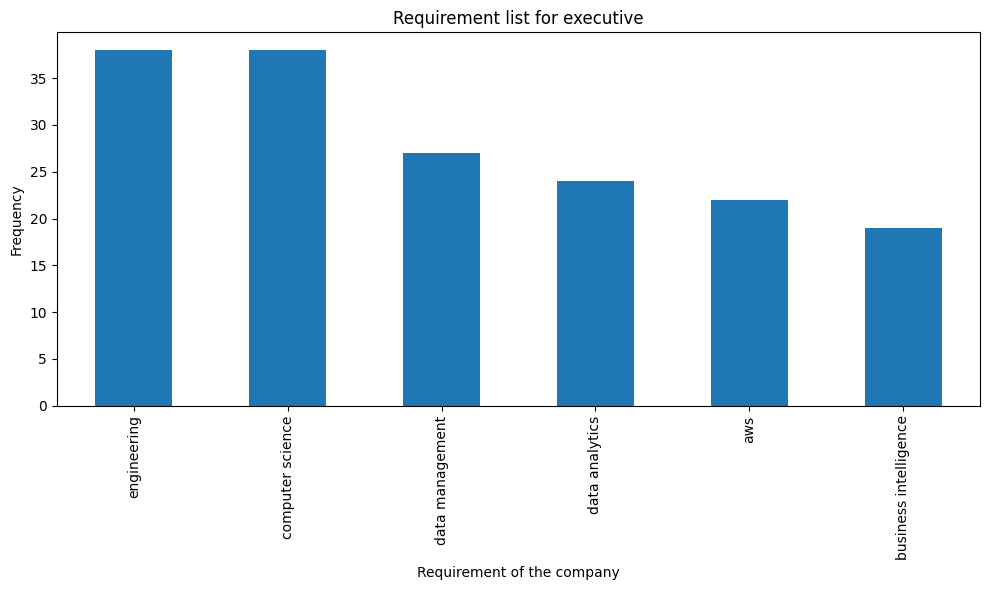

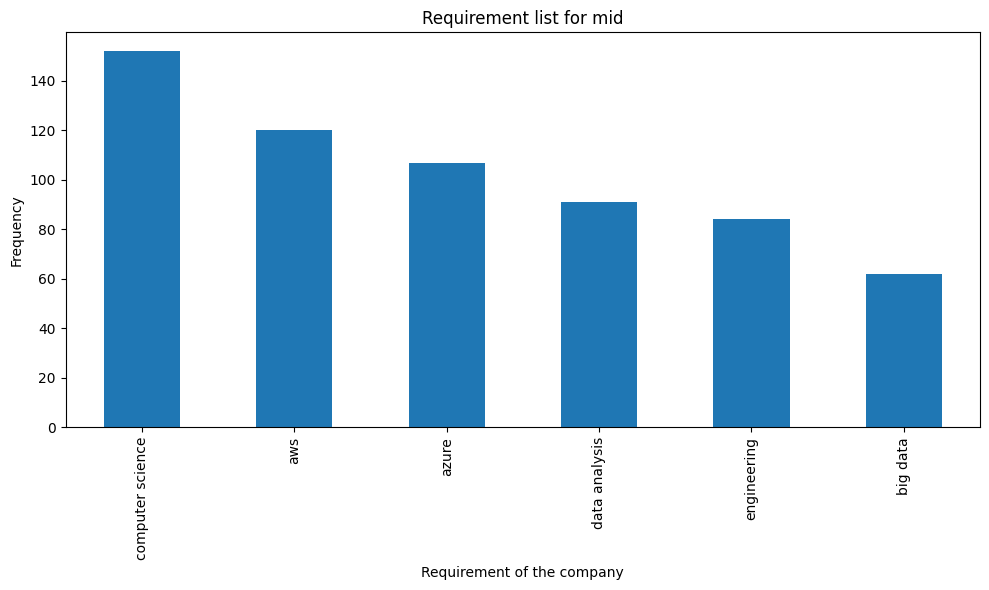

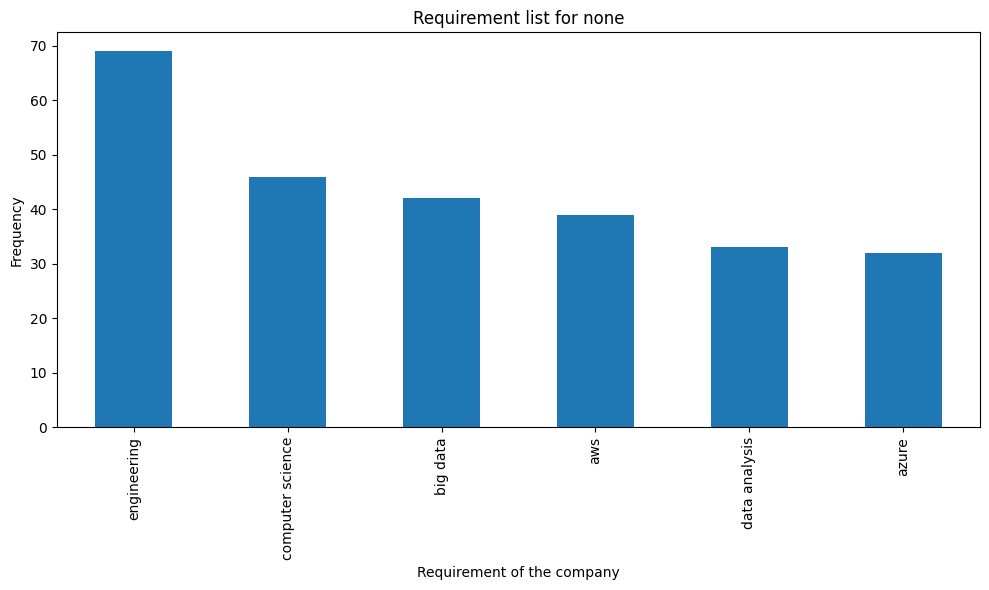

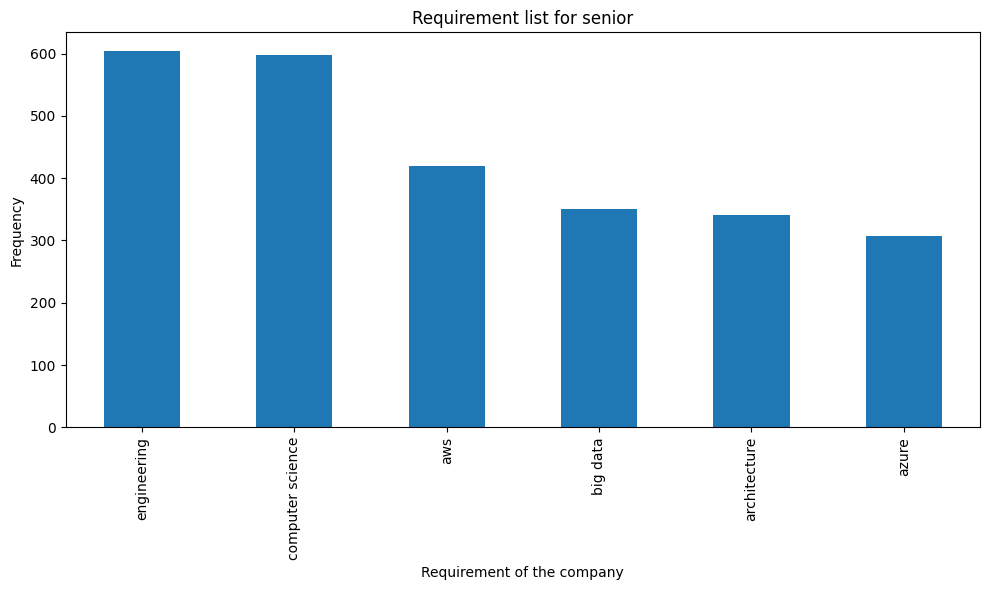

In [191]:
for data in df_Requirement['Experience level'].unique():
    list_requirement(data)

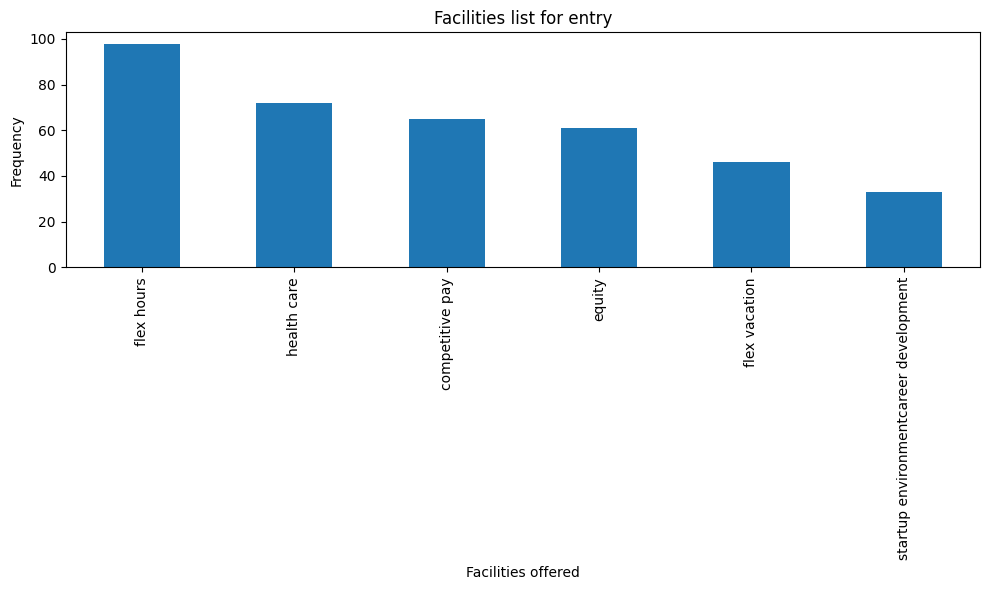

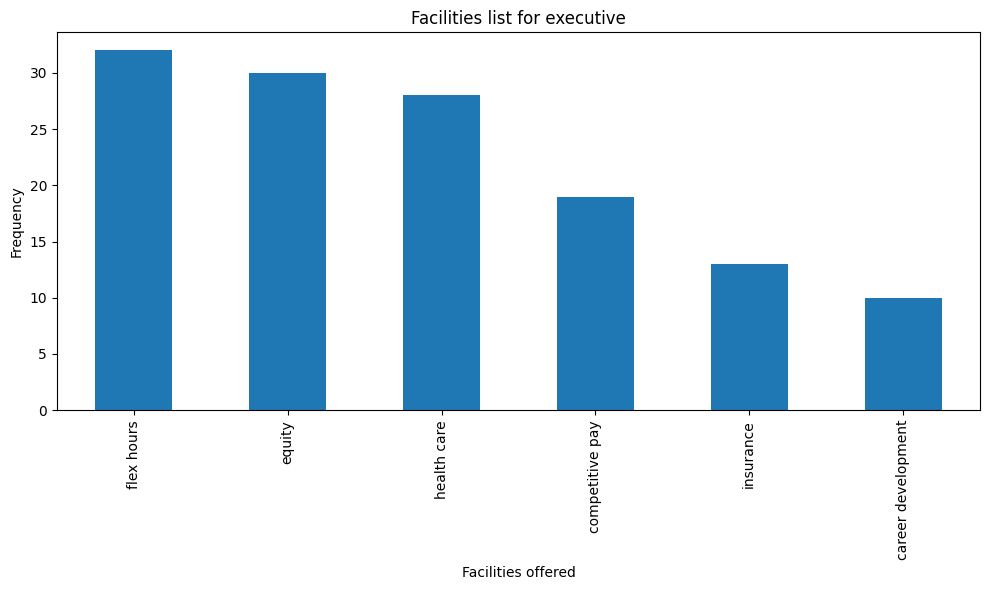

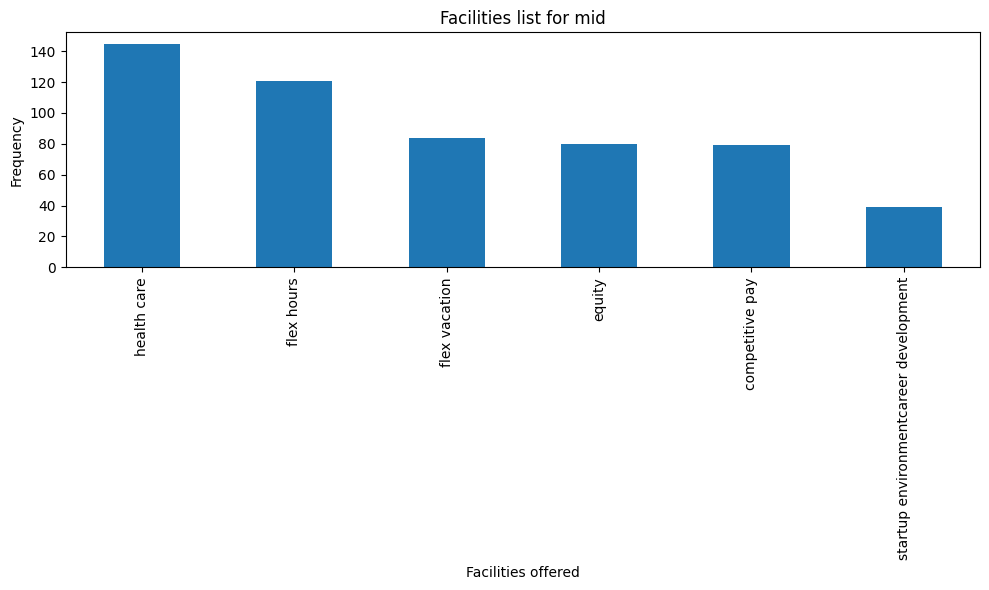

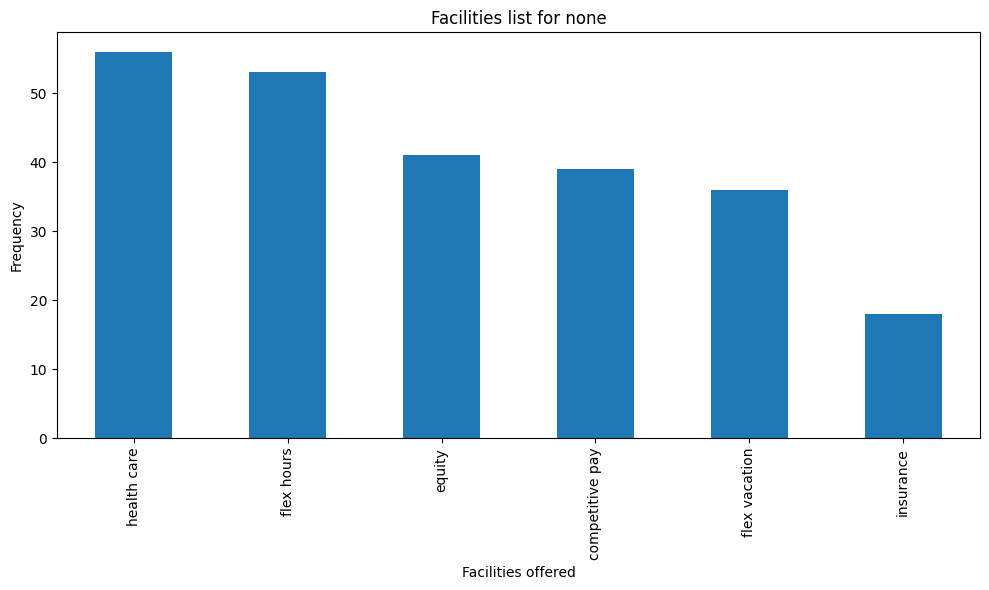

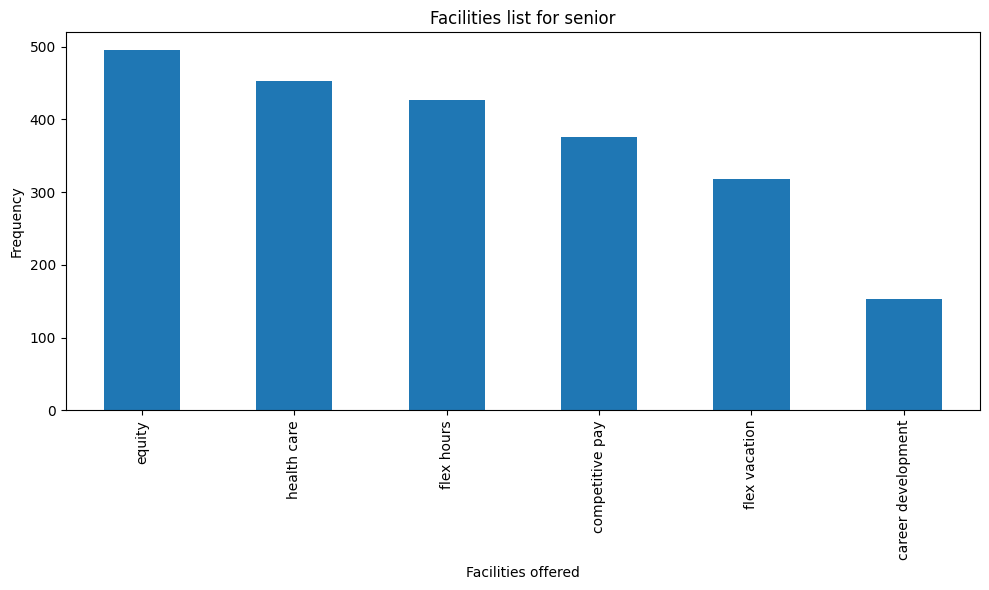

In [192]:
df_facilities = df.groupby('Experience level')['Facilities'].apply(lambda x: ''.join(x)).reset_index()
def list_facilities(data):
    filtered_data = df_facilities[df_facilities['Experience level'] == data]

    facilities_list = [skill.strip() for skills in filtered_data['Facilities'] for skill in skills.split(',') if skill.strip() != ' ']

    facilities_counts = pd.Series(facilities_list).value_counts().head(6)

    facilities_counts.plot(kind='bar', figsize=(10, 6))

    plt.xlabel('Facilities offered')
    plt.ylabel('Frequency')
    plt.title(f'Facilities list for {data}')

    plt.xticks(rotation=90)

    plt.tight_layout()
    plt.show()

for data in df_facilities['Experience level'].unique():
    list_facilities(data)

### Preprocessing & Modeling

In [193]:
df['Updated Job Title'].replace('senior data engineer','data engineer',inplace=True)

In [194]:
df.rename(columns={'Requirement of the company':'keywords'},inplace=True)
df

,Company,Job Title,Job Type,Experience level,Salary,keywords,Facilities,Is Remote,City,Region,Country,Updated Job Title
0,sgs,clinical data analyst,full time,entry,48,"computer science,data quality,genetics,mathema...",None,False,richardson,texas,united states,data analyst
1,ocorian,aml/cft & data analyst,full time,entry,48,"agile,data management,finance,security",None,False,ebène,none,mauritius,data analyst
2,cricut,machine learning engineer,full time,none,90,"agile,architecture,aws,computer science,comput...",career development,False,south jordan,utah,united states,ml engineer
3,bosch group,application developer & data analyst,full time,entry,48,"engineering,industrial,oracle,power bi,r,r&d",None,False,nonantola,none,italy,data analyst
4,publicis groupe,data engineer full time (public sector) usa,full time,mid,108,"aws,azure,computer science,consulting,dataflow...","flex hours,flex vacation,parental leave,unlimi...",False,arlington,virginia,united states,data engineer
...,...,...,...,...,...,...,...,...,...,...,...,...
3589,western digital,data scientist - new college graduate,full time,entry,39,"apis,clustering,computer science,data visualiz...",career development,False,none,new york,united states,data scientist
3590,experian,cloud data analyst,full time,senior,92,"aws,big data,computer science,gcp,snowflake,sql","equity,medical leave,salary bonus",False,biñan,none,philippines,data analyst
3591,locus robotics,"robotics engineer, sensors",full time,senior,62,"e-commerce,engineering,linux,python,robotics,s...",None,False,heredia,none,costa rica,ai engineer
3592,atb financial,data scientist,full time,entry,39,"computer science,data analytics,data mining,ec...","career development,startup environment",False,wilmington,massachusetts,united states,data scientist


In [195]:
df.dropna(inplace=True)

In [196]:
df.isnull().sum()

Company              0
Job Title            0
Job Type             0
Experience level     0
Salary               0
keywords             0
Facilities           0
Is Remote            0
City                 0
Region               0
Country              0
Updated Job Title    0
dtype: int64

In [197]:

keywords_set = set(df['keywords'].str.split(',').apply(pd.Series).stack().reset_index(drop=True))
keywords_set

{'.net',
 '3d graphics',
 '3d reconstruction',
 'a/b testing',
 'agi',
 'agile',
 'ai art',
 'ai content',
 'ai governance',
 'ai strategy',
 'airflow',
 'airtable',
 'aistats',
 'alpaca',
 'amplitude',
 'anaconda',
 'angular',
 'ann',
 'ansible',
 'api development',
 'apis',
 'architecture',
 'arrow',
 'asr',
 'athena',
 'autonomous driving',
 'autoregressive models',
 'avro',
 'aws',
 'azkaban',
 'azure',
 'banking',
 'bayesian',
 'bert',
 'big data',
 'bigquery',
 'bigtable',
 'biochemistry',
 'biology',
 'bitbucket',
 'blockchain',
 'business analytics',
 'business intelligence',
 'c++',
 'cad',
 'caffe',
 'cassandra',
 'causal inference',
 'chatbots',
 'chatgpt',
 'chemistry',
 'ci/cd',
 'circuit design',
 'classification',
 'clinical nlp',
 'clojure',
 'cluster analysis',
 'clustering',
 'cmake',
 'computer science',
 'computer vision',
 'consulting',
 'consulting firm',
 'content creation',
 'conversational ai',
 'copywriting',
 'core ml',
 'coreml',
 'credit risk',
 'crypto',
 

In [198]:
for keyword in keywords_set:
  df[keyword] = 0

In [199]:
df

,Company,Job Title,Job Type,Experience level,Salary,keywords,Facilities,Is Remote,City,Region,...,gpt-3,neurips,dagster,sql,airflow,vr,industrial,consulting firm,matlab,causal inference
0,sgs,clinical data analyst,full time,entry,48,"computer science,data quality,genetics,mathema...",None,False,richardson,texas,...,0,0,0,0,0,0,0,0,0,0
1,ocorian,aml/cft & data analyst,full time,entry,48,"agile,data management,finance,security",None,False,ebène,none,...,0,0,0,0,0,0,0,0,0,0
2,cricut,machine learning engineer,full time,none,90,"agile,architecture,aws,computer science,comput...",career development,False,south jordan,utah,...,0,0,0,0,0,0,0,0,0,0
3,bosch group,application developer & data analyst,full time,entry,48,"engineering,industrial,oracle,power bi,r,r&d",None,False,nonantola,none,...,0,0,0,0,0,0,0,0,0,0
4,publicis groupe,data engineer full time (public sector) usa,full time,mid,108,"aws,azure,computer science,consulting,dataflow...","flex hours,flex vacation,parental leave,unlimi...",False,arlington,virginia,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3589,western digital,data scientist - new college graduate,full time,entry,39,"apis,clustering,computer science,data visualiz...",career development,False,none,new york,...,0,0,0,0,0,0,0,0,0,0
3590,experian,cloud data analyst,full time,senior,92,"aws,big data,computer science,gcp,snowflake,sql","equity,medical leave,salary bonus",False,biñan,none,...,0,0,0,0,0,0,0,0,0,0
3591,locus robotics,"robotics engineer, sensors",full time,senior,62,"e-commerce,engineering,linux,python,robotics,s...",None,False,heredia,none,...,0,0,0,0,0,0,0,0,0,0
3592,atb financial,data scientist,full time,entry,39,"computer science,data analytics,data mining,ec...","career development,startup environment",False,wilmington,massachusetts,...,0,0,0,0,0,0,0,0,0,0


In [200]:
for row in df.iterrows():
  row_num = row[0]
  row = row[1]
  for row_keyword in row['keywords'].split(','):
    row_keyword = row_keyword.strip()
    df[row_keyword][row_num] = 1
df

,Company,Job Title,Job Type,Experience level,Salary,keywords,Facilities,Is Remote,City,Region,...,gpt-3,neurips,dagster,sql,airflow,vr,industrial,consulting firm,matlab,causal inference
0,sgs,clinical data analyst,full time,entry,48,"computer science,data quality,genetics,mathema...",None,False,richardson,texas,...,0,0,0,0,0,0,0,0,0,0
1,ocorian,aml/cft & data analyst,full time,entry,48,"agile,data management,finance,security",None,False,ebène,none,...,0,0,0,0,0,0,0,0,0,0
2,cricut,machine learning engineer,full time,none,90,"agile,architecture,aws,computer science,comput...",career development,False,south jordan,utah,...,0,0,0,0,0,0,0,0,0,0
3,bosch group,application developer & data analyst,full time,entry,48,"engineering,industrial,oracle,power bi,r,r&d",None,False,nonantola,none,...,0,0,0,0,0,0,1,0,0,0
4,publicis groupe,data engineer full time (public sector) usa,full time,mid,108,"aws,azure,computer science,consulting,dataflow...","flex hours,flex vacation,parental leave,unlimi...",False,arlington,virginia,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3589,western digital,data scientist - new college graduate,full time,entry,39,"apis,clustering,computer science,data visualiz...",career development,False,none,new york,...,0,0,0,0,0,0,0,0,0,0
3590,experian,cloud data analyst,full time,senior,92,"aws,big data,computer science,gcp,snowflake,sql","equity,medical leave,salary bonus",False,biñan,none,...,0,0,0,1,0,0,0,0,0,0
3591,locus robotics,"robotics engineer, sensors",full time,senior,62,"e-commerce,engineering,linux,python,robotics,s...",None,False,heredia,none,...,0,0,0,0,0,0,0,0,0,0
3592,atb financial,data scientist,full time,entry,39,"computer science,data analytics,data mining,ec...","career development,startup environment",False,wilmington,massachusetts,...,0,0,0,0,0,0,0,0,0,0


#### Checking to see if custom one-hot encoding works

In [201]:
df['keywords'].iloc[0]

'computer science,data quality,genetics,mathematics,sas,statistics'

In [202]:
df[['computer science','data quality','genetics','mathematics','sas','statistics']].iloc[0]

computer science    1
data quality        1
genetics            1
mathematics         1
sas                 1
statistics          1
Name: 0, dtype: int64

In [203]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['Experience level'])

LabelEncoder()

In [204]:
df['Experience level'] = le.transform(df['Experience level'])

In [205]:
df.columns

Index(['Company', 'Job Title', 'Job Type', 'Experience level', 'Salary',
       'keywords', 'Facilities', 'Is Remote', 'City', 'Region',
       ...
       'gpt-3', 'neurips', 'dagster', 'sql', 'airflow', 'vr', 'industrial',
       'consulting firm', 'matlab', 'causal inference'],
      dtype='object', length=297)

In [206]:
input_df = df[[column for column in df.columns if column not in ['Company','Job Title','Job Type','Facilities','Is Remote','keywords']]]
input_df.columns

Index(['Experience level', 'Salary', 'City', 'Region', 'Country',
       'Updated Job Title', 'cx', 'agile', 'content creation', 'physics',
       ...
       'gpt-3', 'neurips', 'dagster', 'sql', 'airflow', 'vr', 'industrial',
       'consulting firm', 'matlab', 'causal inference'],
      dtype='object', length=291)

In [207]:
target = 'Updated Job Title'
X = input_df[[column for column in input_df.columns if column!=target]]
y = input_df[target]

In [208]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)
X_train = X_train.drop(["City", "Region", "Country"], axis = 1)
X_test = X_test.drop(["City", "Region", "Country"], axis = 1)

In [209]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(max_depth=3, random_state=0)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=0)

In [210]:
print(f"Train score : {rf_clf.score(X_train, y_train)}")


Train score : 0.45326132114665557


In [211]:
print(f"Test score : {rf_clf.score(X_test, y_test)}")

Test score : 0.43470935130581295


In [212]:
from sklearn import svm
svm_clf = svm.SVC()
svm_clf.fit(X_train, y_train)


SVC()

In [213]:
print(f"Train score : {svm_clf.score(X_train, y_train)}")

Train score : 0.31574574158703783


In [214]:
print(f"Test score : {svm_clf.score(X_test, y_test)}")

Test score : 0.3142375737152485


In [215]:
df.to_csv('data_science_job_cleaned.csv', index=False)

In [216]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer


param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_features': ['auto', 'sqrt'],  
    'max_depth': [10, 20, 30, 40],   
    'min_samples_split': [2, 5, 10]    
}


grid_search = GridSearchCV(
    estimator=rf_clf,
    param_grid=param_grid,
    cv=5,  
    scoring=make_scorer(accuracy_score),  
    verbose=1, 
    n_jobs=-1  
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=3, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring=make_scorer(accuracy_score, response_method='predict'),
             verbose=1)

In [217]:
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best parameters found: ", best_params)

Best parameters found:  {'max_depth': 40, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}


In [218]:
rf_clf = RandomForestClassifier(max_depth= 40, max_features= 'sqrt', min_samples_split= 2, n_estimators= 200)